# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Iqbal
- **Email:** mhdiqbal27122018@gmail.com
- **ID Dicoding:** iqballl333

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap total jumlah penyewaan sepeda?
- Bagaimana pola penggunaan sepeda berdasarkan musim?
- Bagaimana distribusi penggunaan sepeda berdasarkan suhu dan kelembapan?

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Gathering data day.csv

In [32]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Gathering Hour.csv

In [33]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Karena day dan hour memiliki data yang relatif sama, kemungkinan saya akan menggunakan data day saja

### Assessing Data

**Cek day_df**
- Cek tipedata day_df

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- cek missing value

In [35]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- cek apabila ada data duplikat pada day_df

In [36]:
print('Jumlah data duplikat: ',day_df.duplicated().sum())

Jumlah data duplikat:  0


- cek nilai statistik day_df

In [37]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**kesimpulan**
- Pada data day_df hanya ditemukan kesalahan tipedata pada dteday yang seharusnya memiliki tipedata datetime

**Cek hour_df**
- cek tipedata hour_df

In [38]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- cek missing value hour_df

In [39]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- cek apabila ada data duplikat pada hour_df

In [40]:
print('Jumlah data duplikat: ',hour_df.duplicated().sum())

Jumlah data duplikat:  0


- cek nilai statistik hour_df

In [41]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Kesimpulan**
- sama seperti day_df kesalahan pada hour_df hanya pada tipedata dteday yang seharusnya berbentuk datetime

### Cleaning Data

**memperbaiki tipedata pada day_df**

In [42]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Memperbaiki tipedata pada hour_df**

In [43]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Kesimpulan :**
- Kemungkinan saya hanya akan memakai data day_df karena hour_df memiliki data yang relatif sama

## Exploratory Data Analysis (EDA)

### Explore day_df

In [44]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- Distribusi sepeda berdasarkan musim

In [45]:
season={1:'spring',2:'summer',3:'fall',4:'winter'}
day_df['season']=day_df['season'].replace(season)
season_count=day_df['season'].value_counts().sort_index()
season_count

,count
season,
fall,188
spring,181
summer,184
winter,178


- Distribusi berdasarkan bulan

In [46]:
day_df['mnth'].value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


- Distribusi berdasarkan kondisi cuaca

In [47]:
weather={1:'clear/Partly cloudy',2:'mist/Cloudy',3:'light rain/light snow',4:'heavy rain'}
day_df['weathersit']=day_df['weathersit'].replace(weather)
weather_count=day_df['weathersit'].value_counts().sort_index()
weather_count

,count
weathersit,
clear/Partly cloudy,463
light rain/light snow,21
mist/Cloudy,247


- Pengelompokkan suhu(temp) dan kelembapan(hum)

In [48]:
day_df['temp_group'] = pd.cut(day_df['temp'], bins=5, labels=['sangat dingin', 'dingin', 'sedang','panas','sangat panas'])
day_df['hum_group'] = pd.cut(day_df['hum'], bins=5, labels=['sangat rendah', 'rendah', 'sedang', 'tinggi', 'sangat tinggi'])

In [49]:
day_df.to_csv('days_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap total jumlah penyewaan sepeda?

<ipython-input-50-a3ab13fb9a5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

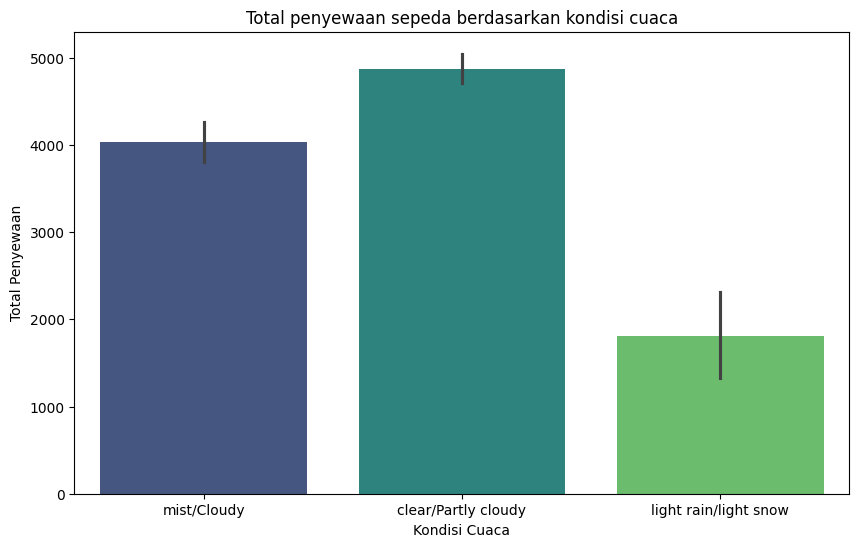

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette='viridis')
plt.title('Total penyewaan sepeda berdasarkan kondisi cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan musim?

<ipython-input-51-3679d3940398>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

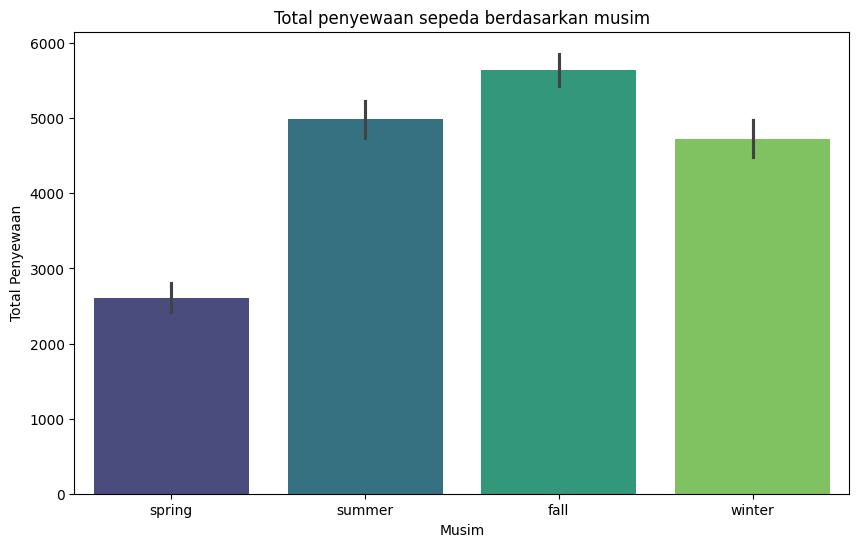

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_df, palette='viridis')
plt.title('Total penyewaan sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 3: Bagaimana distribusi penggunaan sepeda berdasarkan suhu dan kelembapan?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

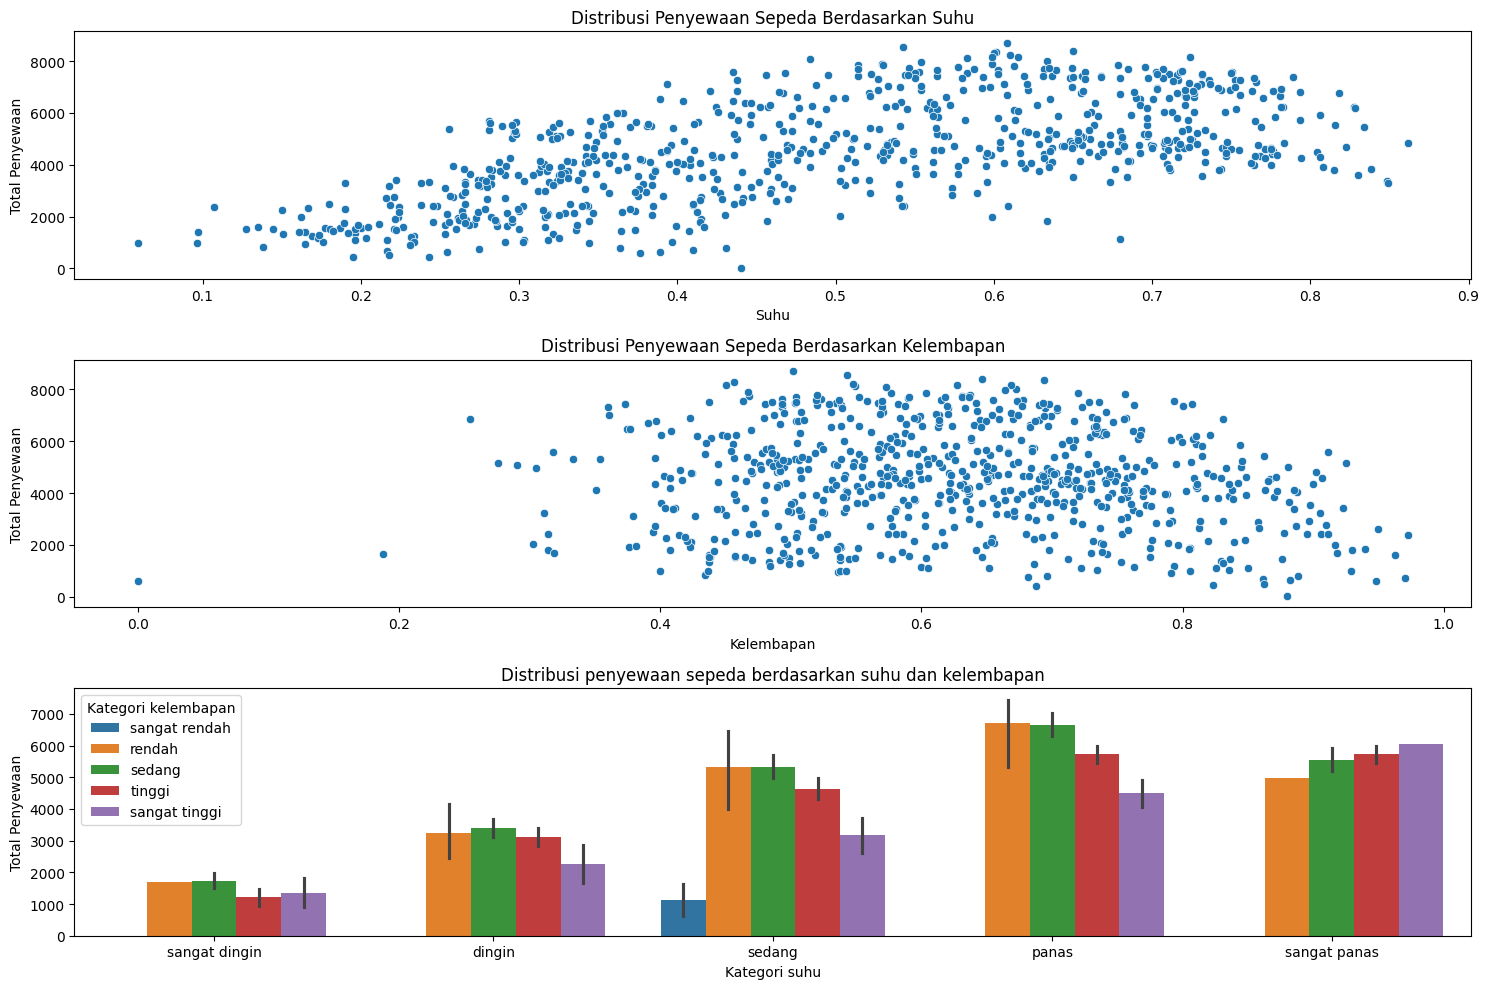

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan suhu
sns.scatterplot(
    x='temp',
    y='cnt',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Distribusi Penyewaan Sepeda Berdasarkan Suhu')
axes[0].set_xlabel('Suhu')
axes[0].set_ylabel('Total Penyewaan')

# Berdasarkan kelembapan
sns.scatterplot(
  x='hum',
  y='cnt',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Distribusi Penyewaan Sepeda Berdasarkan Kelembapan')
axes[1].set_xlabel('Kelembapan')
axes[1].set_ylabel('Total Penyewaan')

# Berdasarkan suhu dan kelembapan
sns.barplot(
  x='temp_group',
  y='cnt',
  hue='hum_group',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Distribusi penyewaan sepeda berdasarkan suhu dan kelembapan')
axes[2].set_xlabel('Kategori suhu')
axes[2].set_ylabel('Total Penyewaan')
axes[2].legend(title='Kategori kelembapan')

plt.tight_layout()
plt.show()


## Conclusion

+ Pengaruh Cuaca terhadap Penyewaan Sepeda:
  - Terlihat pada chart bahwa Cuaca cerah meningkatkan penyewaan sepeda secara signifikan, sedangkan cuaca hujan menyebabkan penurunan jumlah penyewaan. Cuaca mendung masih mendukung, tetapi tidak seefektif cuaca cerah.
+ Pola Penggunaan Sepeda berdasarkan Musim:
  - Penyewaan sepeda tertinggi terjadi pada musim gugur lalu disusul oleh musim panas, sementara musim dingin dan musim semi menunjukkan angka penyewaan terendah, kemungkinan akibat kondisi cuaca yang kurang nyaman.
+ Distribusi Penggunaan Sepeda berdasarkan Suhu dan Kelembapan:
  - Terlihat bahwa Penyewaan sepeda meningkat pada suhu sedang hingga panas dan menurun pada suhu ekstrem. Kelembapan yang sedang hingga tinggi cenderung mendukung penyewaan, tetapi kelembapan yang sangat tinggi atau rendah dapat menurunkan jumlah penyewaan.